In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import scipy

#This is to label all categorical data
from sklearn.preprocessing import LabelEncoder 


import sys
import IPython
import sklearn

from sklearn.cluster import KMeans #This is used for estimation of K-'hyperparameter'

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.datasets import make_blobs #To import a dataset for example 2 down below
import mglearn




In [2]:
train = pd.read_csv("C:\\Users\\dadai\\Downloads\\Machine Learning\\ICA\\BANKING DATA FROM UCI\\BANK MARKETING\\bank.csv")

In [3]:
test = pd.read_csv("C:\\Users\\dadai\\Downloads\\Machine Learning\\ICA\\BANKING DATA FROM UCI\\BANK MARKETING\\bank-full.csv",sep=';')

In [4]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
# define dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [20]:
#Creating label encoders to treat all categorical variables
labelencoder = LabelEncoder()
test["job"] = labelencoder.fit_transform(test["job"])
test["marital"] = labelencoder.fit_transform(test["marital"])
test["education"] = labelencoder.fit_transform(test["education"])
test["default"] = labelencoder.fit_transform(test["default"])
test["housing"] = labelencoder.fit_transform(test["housing"])
test["loan"] = labelencoder.fit_transform(test["loan"])
test["contact"] = labelencoder.fit_transform(test["contact"])
test["month"] = labelencoder.fit_transform(test["month"])
test["poutcome"] = labelencoder.fit_transform(test["poutcome"])

test['y'].map({'no':0, 'yes':1})

working_data = test.copy()

working_data.drop(['pdays'], axis=1,inplace = True)
working_data.drop(['y'], axis=1,inplace = True)


from sklearn.preprocessing import StandardScaler
scaled_data = pd.DataFrame(StandardScaler().fit_transform(working_data),columns=working_data.columns)

In [39]:
independent = scaled_data.values[:,0:15]

target1 = test.values[:, 16]


In [41]:
test['y'].nunique()


1

In [34]:
target1

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [30]:
counter

Counter({'no': 39922, 'yes': 5289})

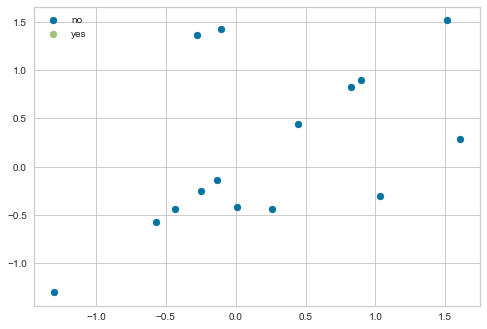

In [32]:
from collections import Counter
counter = Counter(target)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = (target == label)[0]
    plt.scatter(independent[row_ix, 0], independent[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [3]:
allColumns = train.columns

# In order to further understand our dataset, identify the columns with numeric data against categorical to enable proper grouping
# and exploration.

numericColumns= train._get_numeric_data().columns
nCols = numericColumns[0:]
categoricalColumns = list(set(allColumns) - set(numericColumns))

print ('The numericColumns are: ',nCols)
print('\n')
print('The categoricalColumns are: ',categoricalColumns)

The numericColumns are:  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


The categoricalColumns are:  ['poutcome', 'y', 'loan', 'month', 'default', 'job', 'housing', 'education', 'marital', 'contact']


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
print(train.isnull().values.any()) # Check for missing values in the training dataset
print('')
train.isnull().sum()


distinct_marital = train.marital.value_counts()
print(distinct_marital)
print('')

distinct_age = train.age.value_counts().index
print(distinct_age)
print('')
print(train['age'].describe()) # The mean of ages in this training dataset is 41, min_age at 19 and max_age at 87
print('')


distinct_education = train.education.value_counts()
print(distinct_education)
print('')

distinct_default = train.default.value_counts()
print(distinct_default)
print('')

distinct_contact = train.contact.value_counts()
print(distinct_contact)
print('')

distinct_outcome = train.poutcome.value_counts()
print(distinct_outcome)
print('')


False

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

Int64Index([34, 32, 31, 36, 33, 35, 37, 38, 30, 40, 42, 41, 39, 46, 43, 48, 45,
            49, 47, 44, 28, 50, 29, 27, 53, 57, 51, 55, 52, 58, 26, 56, 54, 59,
            60, 25, 24, 23, 61, 22, 66, 63, 70, 21, 64, 62, 65, 77, 69, 71, 80,
            75, 73, 67, 19, 83, 72, 79, 20, 74, 78, 68, 76, 84, 81, 86, 87],
           dtype='int64')

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

no     4445
yes      76
Name: default, dtype: int64

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64



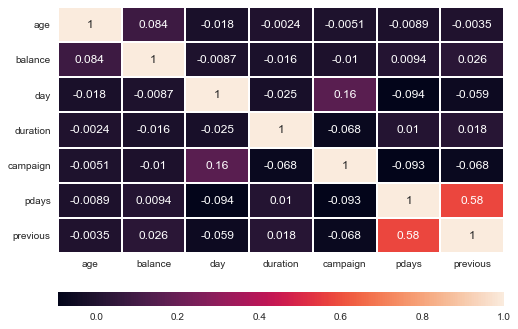

In [6]:
# calculate correlation matrix
grid_kws = {'height_ratios':(0.9,0.05),'hspace':0.3}
f,(ax,cbar_ax)=plt.subplots(2,gridspec_kw=grid_kws)

corr = train.corr()

ax= sns.heatmap(corr,annot=True,annot_kws={'fontsize':12},linewidths= 1,ax=ax,cbar_ax=cbar_ax,cbar_kws={'orientation':'horizontal'})

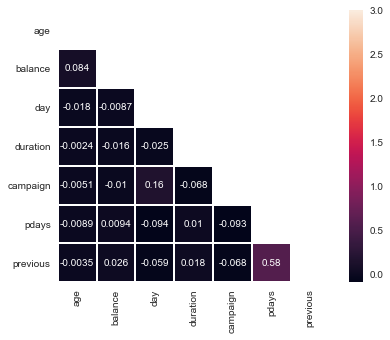

In [7]:
corr = train.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f,ax= plt.subplots(figsize=(7,5))
    ax= sns.heatmap(corr,mask=mask,annot=True,annot_kws={'fontsize':10},linewidths= 1,vmax=3,square = True)

C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Calls made on Different Period of Months')

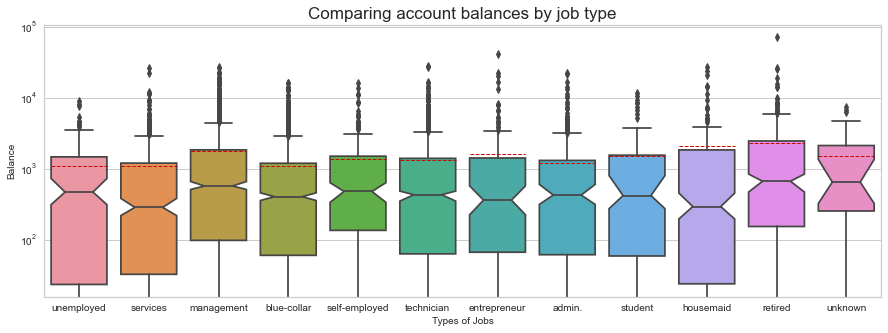

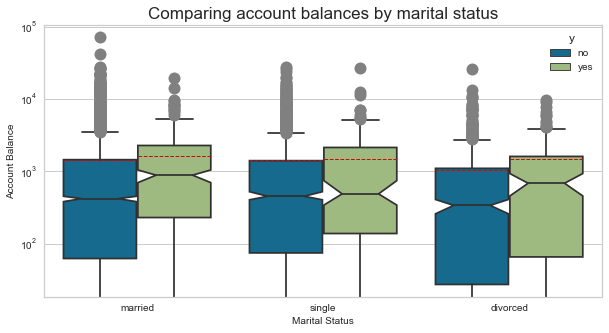

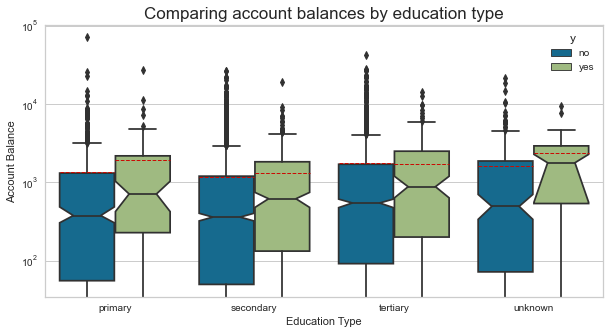

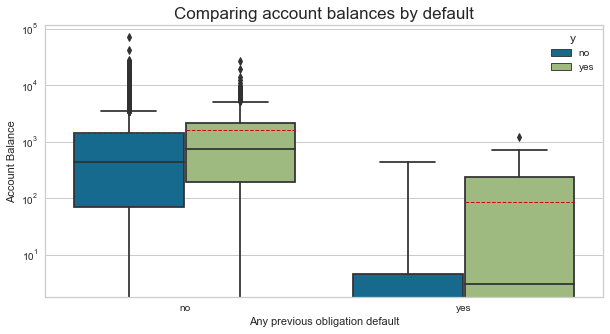

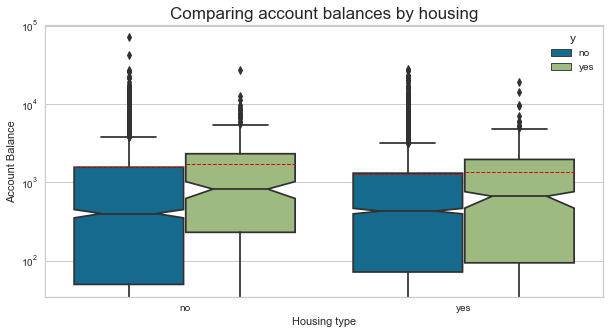

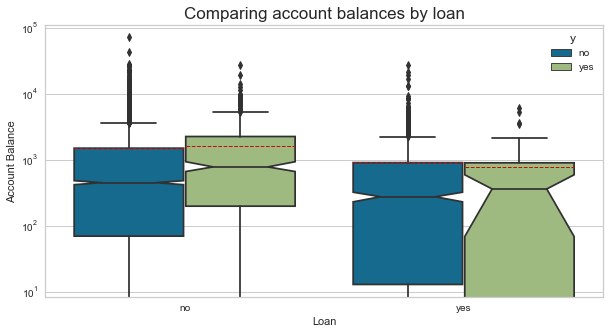

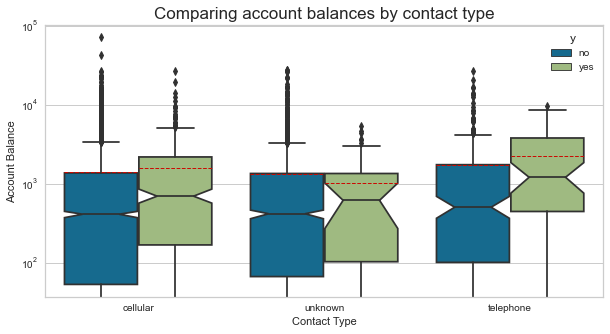

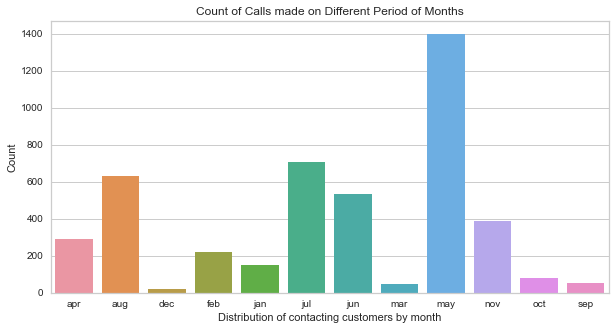

In [77]:
# Visualizing relationship between categorical columns and balance

flierprops = dict(marker='o', markerfacecolor='grey', markersize=12,markeredgecolor='none')

fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(x = "job", y = "balance", data = train, orient = 'v', showmeans=True, meanline=True, notch=True, bootstrap=10000)
ax.set_xlabel("Types of Jobs",fontsize=10)
ax.set_ylabel("Balance",fontsize =10)
ax.set_yscale("log")
ax.set_title("Comparing account balances by job type",fontsize = 17)

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "marital", y = "balance", data = train, hue ='y',showmeans=True, meanline=True,flierprops=flierprops,notch=True,bootstrap=10000)
ax.set_xlabel("Marital Status",fontsize=10)
ax.set_ylabel("Account Balance",fontsize=10)
ax.set_yscale("log")
ax.set_title("Comparing account balances by marital status",fontsize = 17)

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "education", y = "balance", data = train,hue='y',orient = 'v',showmeans=True, meanline=True,notch=True,bootstrap=20000)
ax.set_xlabel("Education Type")
ax.set_ylabel("Account Balance")
ax.set_yscale("log")
ax.set_title("Comparing account balances by education type",fontsize = 17)


fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "default", y = "balance", data = train,hue='y',orient = 'v',showmeans=True, meanline=True)
ax.set_xlabel("Any previous obligation default")
ax.set_ylabel("Account Balance")
ax.set_yscale("log")
ax.set_title("Comparing account balances by default",fontsize = 17)

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "housing", y = "balance", data = train,hue='y',orient = 'v',showmeans=True, meanline=True,notch=True,bootstrap=20000)
ax.set_xlabel("Housing type")
ax.set_ylabel("Account Balance")
ax.set_yscale("log")
ax.set_title("Comparing account balances by housing",fontsize = 17)

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "loan", y = "balance", data = train,hue='y',orient = 'v',showmeans=True, meanline=True,notch=True,bootstrap=20000)
ax.set_xlabel("Loan")
ax.set_ylabel("Account Balance")
ax.set_yscale("log")
ax.set_title("Comparing account balances by loan",fontsize = 17)

fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(x = "contact", y = "balance", data = train,hue='y',orient = 'v',showmeans=True, meanline=True,notch=True,bootstrap=20000)
ax.set_xlabel("Contact Type")
ax.set_ylabel("Account Balance")
ax.set_yscale("log")
ax.set_title("Comparing account balances by contact type",fontsize = 17)


#The shows the distribution by months the count of contact made to customers - The peak month is May
fig, ax = plt.subplots(figsize = (10, 5))
sns.countplot(sorted(train['month']))
ax.set_xlabel("Distribution of contacting customers by month")
ax.set_ylabel("Count")
ax.set_title("Count of Calls made on Different Period of Months")

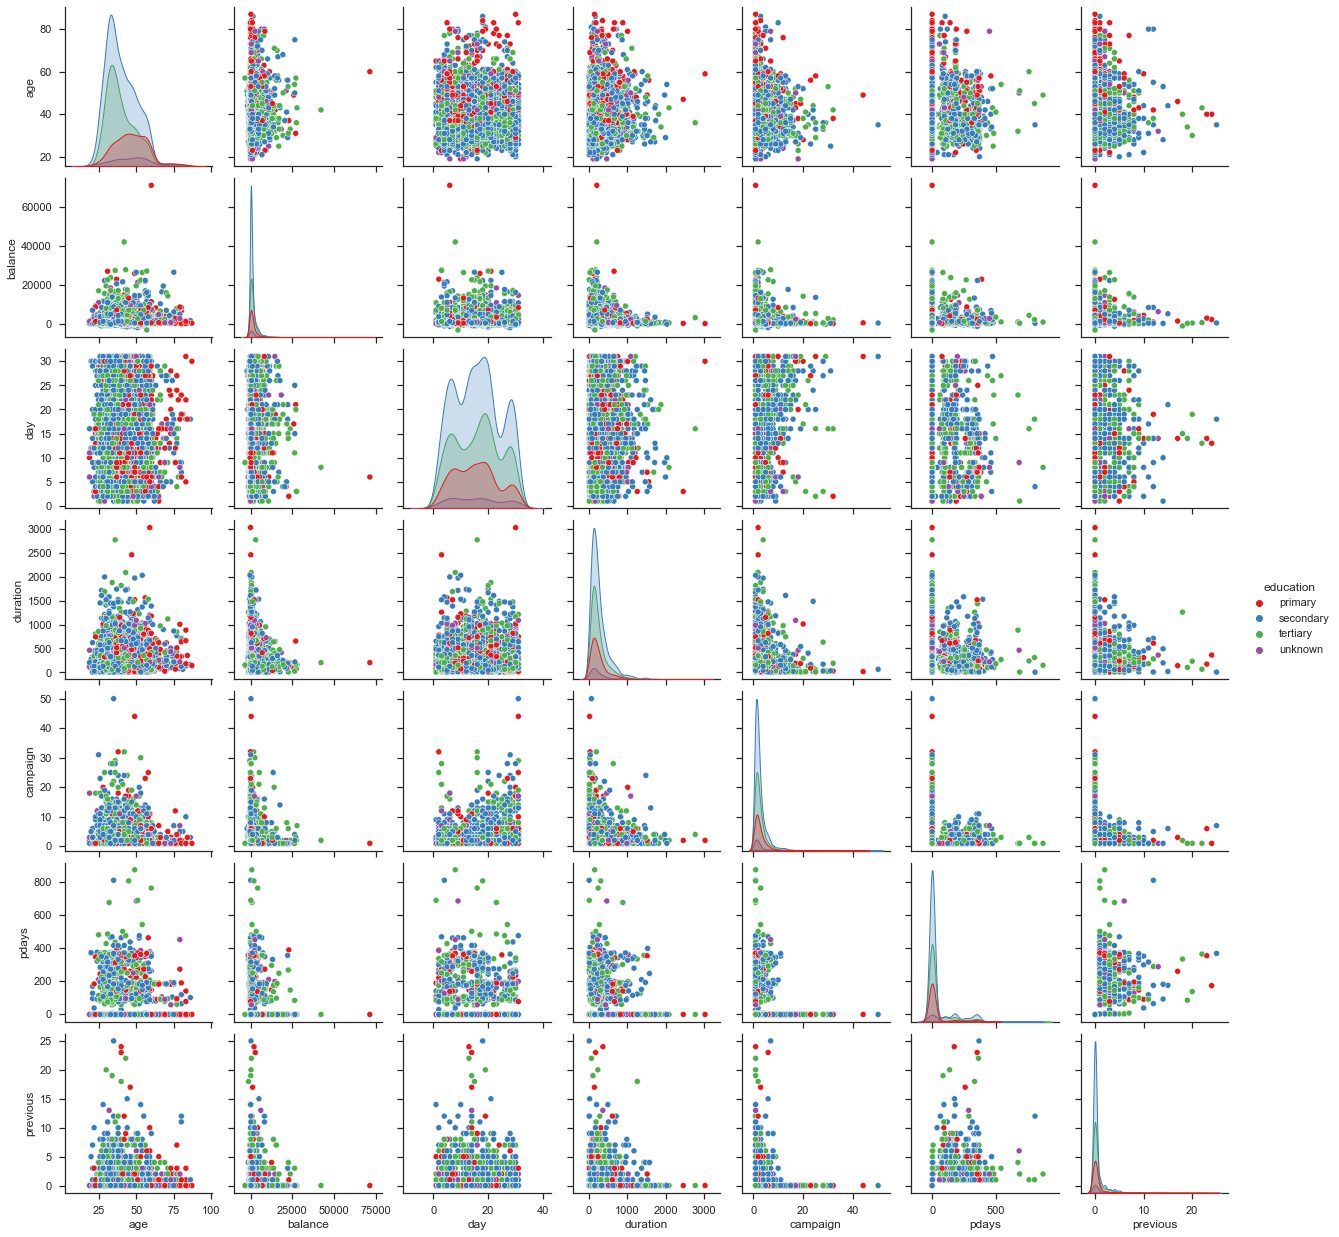

In [86]:
sns.set(style="ticks")
sns.pairplot(train, hue="education", palette="Set1")

In [88]:
#Creating label encoders to treat all categorical variables
labelencoder_X = LabelEncoder()
train["job"] = labelencoder_X.fit_transform(train["job"])
train["marital"] = labelencoder_X.fit_transform(train["marital"])
train["education"] = labelencoder_X.fit_transform(train["education"])
train["default"] = labelencoder_X.fit_transform(train["default"])
train["housing"] = labelencoder_X.fit_transform(train["housing"])
train["loan"] = labelencoder_X.fit_transform(train["loan"])
train["contact"] = labelencoder_X.fit_transform(train["contact"])
train["month"] = labelencoder_X.fit_transform(train["month"])
train["poutcome"] = labelencoder_X.fit_transform(train["poutcome"])

In [99]:
#Creating label encoders to treat all categorical variables
labelencoder_X = LabelEncoder()
test["job"] = labelencoder_X.fit_transform(test["job"])
test["marital"] = labelencoder_X.fit_transform(test["marital"])
test["education"] = labelencoder_X.fit_transform(test["education"])
test["default"] = labelencoder_X.fit_transform(test["default"])
test["housing"] = labelencoder_X.fit_transform(test["housing"])
test["loan"] = labelencoder_X.fit_transform(test["loan"])
test["contact"] = labelencoder_X.fit_transform(test["contact"])
test["month"] = labelencoder_X.fit_transform(test["month"])
test["poutcome"] = labelencoder_X.fit_transform(test["poutcome"])

In [100]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


In [92]:
import copy

trainCopy = copy.deepcopy(train)
testCopy = copy.deepcopy(test)

In [141]:
train.drop(['pdays'], axis=1,inplace = True)

In [164]:
test.drop(['pdays'], axis=1,inplace = True)

In [196]:
test['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [91]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [1]:
# Separating the target variable
independent = train.values[:,0:15]
target = train.values[:, 16]

# Splitting the dataset into train and test
independent_train, independent_test, target_train, target_test = train_test_split(
independent, target, test_size = 0.3, random_state = 100) 


independent,target,independent_train, independent_test, target_train, target_test

# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,splitter="best",max_depth=None,min_samples_leaf=11) 

# Performing training
clf_gini.fit(independent_train, target_train)
clf_gini

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 7, min_samples_leaf = 5) 

# Performing training
clf_entropy.fit(independent_train, target_train)
clf_entropy

# Function to make predictions// clf_object is the same as either clf_gini or clf_entropy

target_pred = clf_gini.predict(independent_test)
print("Predicted values:")
print(target_pred)

# Function to calculate accuracy

print("Confusion Matrix: ",confusion_matrix(target_test, target_pred))
print ("Accuracy : ",accuracy_score(target_test,target_pred)*100)
print("Report : ", classification_report(target_test, target_pred))


# Function to make predictions// clf_object is the same as either clf_gini or clf_entropy

target_pred_withEntropy = clf_entropy.predict(independent_test)
print("Predicted values using classifier object with entropy:")
print(target_pred_withEntropy)

# Function to calculate accuracy

print("Confusion Matrix: ",confusion_matrix(target_test, target_pred_withEntropy))
print ("Accuracy : ",accuracy_score(target_test,target_pred_withEntropy)*100)
print("Report : ", classification_report(target_test, target_pred_withEntropy)) 


NameError: name 'train' is not defined

# TRYING TO TEST ON A NEW DATASET TO SEE IF ACCURACY WILL DROP OR INCREASE

[Text(310.6324991754617, 292.4804347826087, 'X[10] <= 9.91\ngini = 0.211\nsamples = 3164\nvalue = [2785, 379]'),
 Text(196.6549719656992, 279.4813043478261, 'X[14] <= 2.886\ngini = 0.197\nsamples = 3074\nvalue = [2734, 340]'),
 Text(81.2707124010554, 266.4821739130435, 'X[14] <= 1.387\ngini = 0.335\nsamples = 516\nvalue = [406, 110]'),
 Text(58.89182058047493, 253.4830434782609, 'X[11] <= 843.556\ngini = 0.246\nsamples = 439\nvalue = [376, 63]'),
 Text(35.33509234828496, 240.48391304347828, 'X[2] <= 0.474\ngini = 0.226\nsamples = 415\nvalue = [361, 54]'),
 Text(15.31187335092348, 227.48478260869567, 'X[11] <= 256.872\ngini = 0.369\nsamples = 45\nvalue = [34, 11]'),
 Text(9.422691292875989, 214.48565217391305, 'X[13] <= 1.413\ngini = 0.238\nsamples = 29\nvalue = [25, 4]'),
 Text(4.711345646437994, 201.48652173913047, 'X[11] <= 184.519\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(2.355672823218997, 188.48739130434785, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(7.0670184696

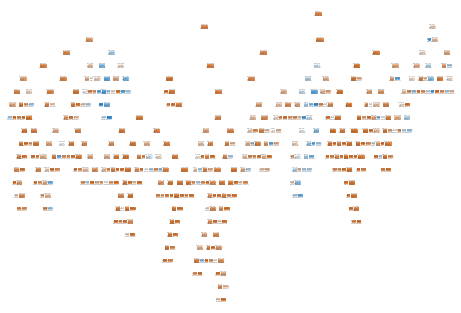

In [221]:
from sklearn import tree


from sklearn.tree import plot_tree
plot_tree(clf_gini, filled=True)

In [231]:
# Separating the target variable using another set of data set
independent_new = test.values[:,0:15]
target_new = test.values[:, 15]

# Splitting the dataset into train and test
independent_new_train, independent_new_test, target_new_train, target_new_test = train_test_split(
independent_new, target_new, test_size = 0.5, random_state = 100) 

independent_new,target_new,independent_new_train, independent_new_test, target_new_train, target_new_test

# Function to make predictions// clf_object is the same as either clf_gini or clf_entropy
target_new_pred = clf_gini.predict(independent_new_test)
print("Predicted values:")
print(target_new_pred)

# Function to calculate accuracy
print("Confusion Matrix: ",confusion_matrix(target_new_test, target_new_pred))
print ("Accuracy : ",accuracy_score(target_new_test,target_new_pred)*100)
print("Report : ", classification_report(target_new_test, target_new_pred))

# Function to make predictions// clf_object is the same as either clf_gini or clf_entropy
target_new_pred_withEntropy = clf_entropy.predict(independent_new_test)
print("Predicted values using classifier object with entropy:")
print(target_new_pred_withEntropy)

# Function to calculate accuracy
print("Confusion Matrix: ",confusion_matrix(target_new_test, target_new_pred_withEntropy))
print ("Accuracy : ",accuracy_score(target_new_test,target_new_pred_withEntropy)*100)
print("Report : ", classification_report(target_new_test, target_new_pred_withEntropy)) 


Predicted values:
['no' 'no' 'no' ... 'no' 'yes' 'no']
Confusion Matrix:  [[18929  1035]
 [ 1584  1058]]
Accuracy :  88.41458019994691
Report :                precision    recall  f1-score   support

          no       0.92      0.95      0.94     19964
         yes       0.51      0.40      0.45      2642

    accuracy                           0.88     22606
   macro avg       0.71      0.67      0.69     22606
weighted avg       0.87      0.88      0.88     22606

Predicted values using classifier object with entropy:
['no' 'no' 'no' ... 'no' 'yes' 'no']
Confusion Matrix:  [[19216   748]
 [ 1713   929]]
Accuracy :  89.11350968769354
Report :                precision    recall  f1-score   support

          no       0.92      0.96      0.94     19964
         yes       0.55      0.35      0.43      2642

    accuracy                           0.89     22606
   macro avg       0.74      0.66      0.69     22606
weighted avg       0.88      0.89      0.88     22606



# SECOND MODEL: RANDOM FOREST 

In [238]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Separating the target variable
independent = train.values[:,0:15]
target = train.values[:, 15]

# Splitting the dataset into train and test
independent_train, independent_test, target_train, target_test = train_test_split(
independent, target, test_size = 0.3, random_state = 100) 


independent,target,independent_train, independent_test, target_train, target_test

In [239]:
clf.fit(independent_train,target_train)


RandomForestClassifier()

In [240]:
target_pred_randomforest =clf.predict(independent_test)

In [241]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred_randomforest))


Accuracy: 0.9056742815033162


THIS NEXT TWO CELLS IS TO REVALIDATED THE ACCURACY OF THE RANDOM FOREST BY TESTING WITH SOME NEW TESTING DATA FROM IMPORTED TEST DATA SET FROM STEP ()

In [244]:
target_new_pred_randomforest =clf.predict(independent_new_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_new_test, target_new_pred_randomforest))

Accuracy: 0.9047597982836415


In [246]:
# To check the features and effect on the tree

feature_imp =pd.Series(clf.feature_importances_,index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome']).sort_values(ascending=False)


In [247]:
feature_imp

duration     0.277654
balance      0.112773
age          0.112752
day          0.103485
month        0.088058
job          0.054276
campaign     0.048680
poutcome     0.042828
previous     0.037097
education    0.032700
marital      0.027691
contact      0.024477
housing      0.020801
loan         0.012459
default      0.004269
dtype: float64

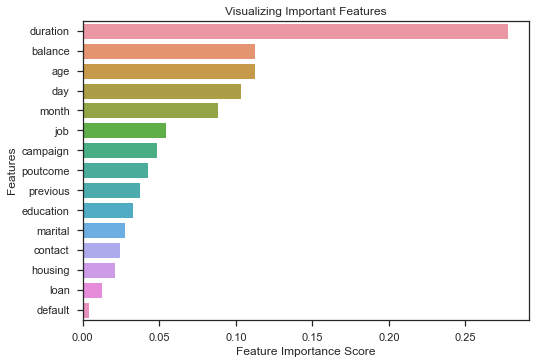

In [253]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [273]:
# Drop the last noise feature "default" as it is lesser than 0.01 to improve accuracy
independent_drop = train[['age','job','education','balance','day','month','duration','campaign','poutcome' ]]
target = train.values[:, 15]

# Splitting the dataset into train and test
independent_afterdropping_train, independent_afterdropping_test, target_afterdropping_train, target_afterdropping_test = train_test_split(
independent_drop, target, test_size = 0.3, random_state = 100) 

clf.fit(independent_afterdropping_train,target_afterdropping_train)

target_dropped_pred_randomforest =clf.predict(independent_afterdropping_test)

print("Accuracy:",metrics.accuracy_score(target_afterdropping_test, target_dropped_pred_randomforest))

Accuracy: 0.9078850405305822


# Third Model Algorithm: Gradient Boosting Classifier

In [274]:
# Separating the target variable
independent = train.values[:,0:15]
target = train.values[:, 15]

# Splitting the dataset into train and test
independent_train, independent_test, target_train, target_test = train_test_split(
independent, target, test_size = 0.3, random_state = 100) 


independent,target,independent_train, independent_test, target_train, target_test


(array([[30, 10, 1, ..., 1, 0, 3],
        [33, 7, 1, ..., 1, 4, 0],
        [35, 4, 2, ..., 1, 1, 0],
        ...,
        [57, 9, 1, ..., 11, 0, 3],
        [28, 1, 1, ..., 4, 3, 1],
        [44, 2, 2, ..., 2, 7, 1]], dtype=object),
 array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object),
 array([[33, 1, 1, ..., 3, 0, 3],
        [28, 1, 2, ..., 2, 0, 3],
        [41, 1, 1, ..., 3, 0, 3],
        ...,
        [31, 1, 1, ..., 1, 0, 3],
        [40, 10, 1, ..., 2, 1, 0],
        [37, 4, 1, ..., 2, 0, 3]], dtype=object),
 array([[52, 5, 1, ..., 1, 3, 0],
        [40, 4, 2, ..., 3, 0, 3],
        [32, 9, 2, ..., 1, 1, 2],
        ...,
        [31, 7, 1, ..., 1, 0, 3],
        [41, 4, 1, ..., 8, 0, 3],
        [22, 8, 2, ..., 1, 3, 0]], dtype=object),
 array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object),
 array(['no', 'no', 'yes', ..., 'no', 'no', 'yes'], dtype=object))

In [276]:
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(independent_train, target_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(independent_train,target_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(independent_test, target_test)))


Accuracy on training set: 0.932
Accuracy on test set: 0.909


In [284]:
# To check the features and effect on the tree

feature_imp =pd.Series(clf.feature_importances_,index=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
       'poutcome']).sort_values(ascending=False)




plot_feature_importances_train(gbrt)

NameError: name 'plot_feature_importances_train' is not defined

C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


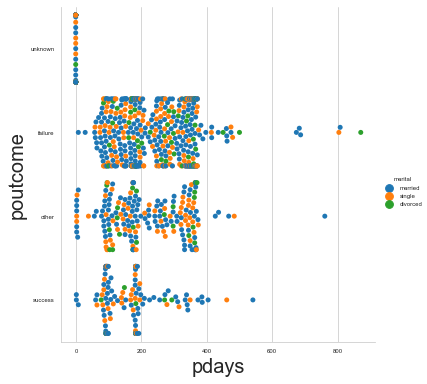

In [74]:
# We observed that from the catplot, 1. Most customers were contacted within the 400 days which is aproximately a year plus one month
# However, we have few cases of outliers

sns.catplot(kind='swarm',hue='marital', x='pdays', y='poutcome',data = train)

In [69]:
train.nunique()
train['poutcome'].nunique()

4

C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 99.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


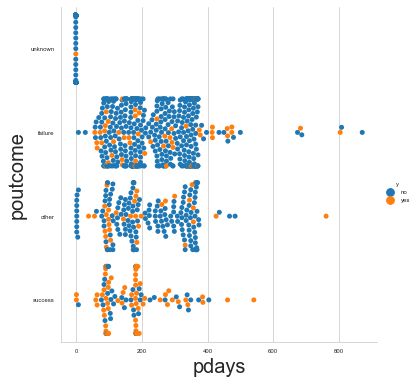

In [75]:
sns.catplot(kind='swarm',hue='y', x='pdays', y='poutcome',data = train)

In [2]:
X = train[['balance','loan']].values

In [11]:
outcome = train.groupby('poutcome').pdays.value_counts().sort_index()
print(outcome)

poutcome  pdays
failure    7          1
           28         1
           57         1
           58         1
           59         1
                   ... 
success    386        1
           404        1
           461        1
           541        1
unknown   -1       3705
Name: pdays, Length: 447, dtype: int64


In [13]:
df = train[['pdays','poutcome']]
df.describe

<bound method NDFrame.describe of       pdays poutcome
0        -1  unknown
1       339  failure
2       330  failure
3        -1  unknown
4        -1  unknown
...     ...      ...
4516     -1  unknown
4517     -1  unknown
4518     -1  unknown
4519    211    other
4520    249    other

[4521 rows x 2 columns]>

In [50]:
train.describe()
train['age'].nunique() # =67 unique customer age ranges
train['age'].max() # Oldest customer is 87
train[train['age'] == 87]

train['age'].min() # Oldest customer is 19
train[train['age'] == 19]
    

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
503,19,student,single,primary,no,103,no,no,cellular,10,jul,104,2,-1,0,unknown,yes
1900,19,student,single,unknown,no,0,no,no,cellular,11,feb,123,3,-1,0,unknown,no
2780,19,student,single,secondary,no,302,no,no,cellular,16,jul,205,1,-1,0,unknown,yes
3233,19,student,single,unknown,no,1169,no,no,cellular,6,feb,463,18,-1,0,unknown,no


In [66]:
train['loan'] = train['loan'].replace(['no','yes'],[0,1])
train['loan'].value_counts()

0    3830
1     691
Name: loan, dtype: int64

In [56]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,0,unknown,5,may,226,1,-1,0,unknown,no


In [71]:
X = train[['loan','balance']].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [76]:
print(X_scaled)

[[-0.42475611  0.12107186]
 [ 2.3542922   1.1186443 ]
 [-0.42475611 -0.02414438]
 ...
 [-0.42475611 -0.37472364]
 [-0.42475611 -0.09492484]
 [ 2.3542922  -0.09525714]]


In [77]:
model = KMeans(n_clusters = 3, random_state =42)
model
model.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [78]:
centroids = model.cluster_centers_
centroids

array([[-0.42475611, -0.15841051],
       [ 2.3542922 , -0.22331996],
       [-0.33469436,  3.36275614]])

In [80]:
model.predict(X_scaled)

array([0, 1, 0, ..., 0, 0, 1])

The silhouette score for K= 2 is 0.7789492305131517
The silhouette score for K= 3 is 0.8215542113989852
The silhouette score for K= 4 is 0.7769536639940229
The silhouette score for K= 5 is 0.7706671199222792
The silhouette score for K= 6 is 0.7426595111753211
The silhouette score for K= 7 is 0.7156963113063094
The silhouette score for K= 8 is 0.704667114883139
The silhouette score for K= 9 is 0.6579882982843972
The silhouette score for K= 10 is 0.641099747498893


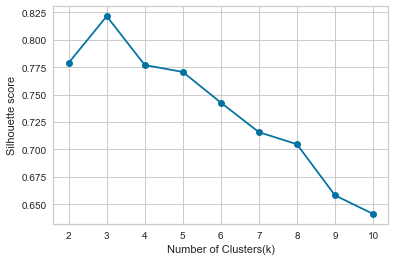

In [85]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range (2,11):
    model_2 = KMeans(n_clusters = k, random_state = 42)
    model_2.fit(X_scaled)
    score = silhouette_score(X_scaled, model_2.labels_)
    print('The silhouette score for K=',k,'is',score)
    silhouette_scores.append(score)

plt.plot(range(2,11),silhouette_scores,marker='o')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Silhouette score')
plt.savefig('Silhouette plot.png')

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4521 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

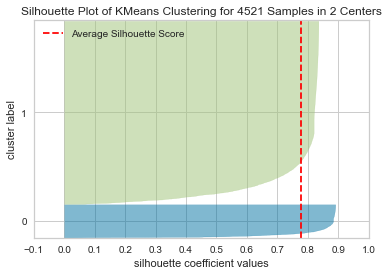

In [96]:
from yellowbrick.cluster import SilhouetteVisualizer

model_k_4 = KMeans(n_clusters = 2,random_state=42)
visualizer_k_4 = SilhouetteVisualizer(model_k_4, colors = 'yellowbrick')
visualizer_k_4.fit(X_scaled)
visualizer_k_4.show(outpath ='silhouettePlot.png')

In [97]:
KMeansModel = KMeans(n_clusters =2)
KMeansModel.fit(X_scaled)

print('The cluster data points are:\n{}'.format(KMeansModel.labels_))

The cluster data points are:
[0 1 0 ... 0 0 1]


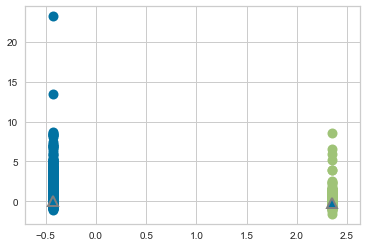

In [99]:
kcentroids = KMeansModel.cluster_centers_

mglearn.discrete_scatter(X_scaled[:,0],X_scaled[:,1],KMeansModel.labels_,markers="o")
mglearn.discrete_scatter(kcentroids[:,0],kcentroids[:,1],markers ="^",markeredgewidth = 2)

In [84]:
sns.scatterplot(x='balance', y='loan',data=X,hue =model.labels_,s=60,palette=['green','blue'])
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],marker ="*",s=400,color='red')

plt.savefig('clustering.png',dpi = 100)

ValueError: Could not interpret value `balance` for parameter `x`

In [131]:
### identigyind categorical and numerical columns
cols = train.columns
num_cols= train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [132]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [133]:
cat_cols

['job',
 'marital',
 'default',
 'poutcome',
 'contact',
 'housing',
 'y',
 'education',
 'month',
 'loan']

In [154]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\dadai\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


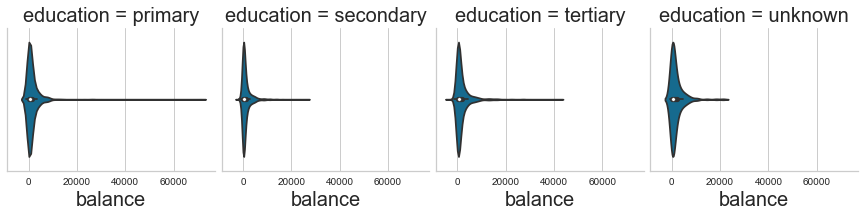

In [162]:
edu = sns.FacetGrid(train, col="education")
edu.map(sns.violinplot,'balance')

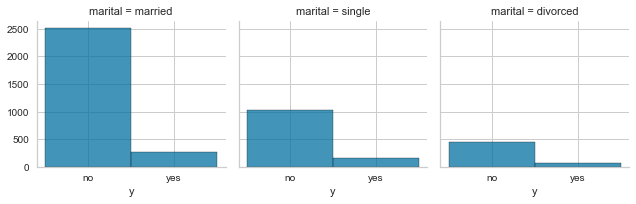

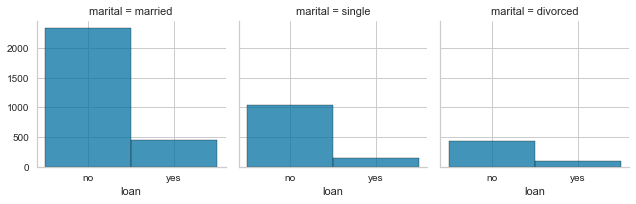

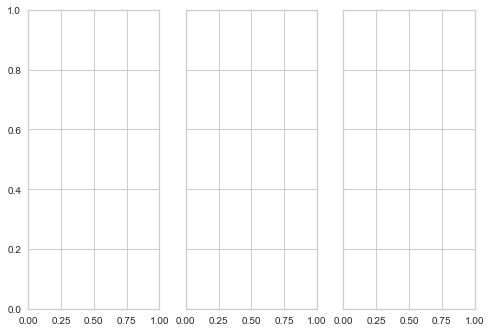

In [64]:
mar = sns.FacetGrid(train, col="marital")
ax1 = mar.map(sns.histplot,'y')

mar = sns.FacetGrid(train, col="marital")
ax2 = mar.map(sns.histplot,'loan')

(ax1, ax2) = plt.subplots(1,3,sharey=True)


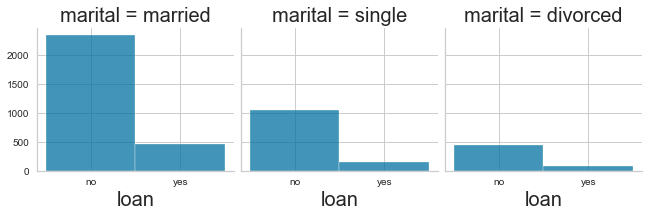

In [163]:
mar = sns.FacetGrid(train, col="marital")
mar.map(sns.histplot,'loan')

In [165]:
#status= train.marital.value_counts().index
status = train.marital.value_counts()
status

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [25]:
headers= abbey.columns

In [65]:
list1 = np.array([[100,200,300],[50,40,60],[150,400,200]])
rownames = ['apples','mangoes','oranges']
colnames = ['January','February','March']

mydf = pd.DataFrame(list1,index=rownames,columns=colnames)
print(mydf)

         January  February  March
apples       100       200    300
mangoes       50        40     60
oranges      150       400    200


In [66]:
names = pd.Series(['Isaac','Idowu','Sam'])
scores = pd.Series([1000,34444,788])
mylist= pd.DataFrame({'Names':names,'Scores':scores})
print(mylist)

   Names  Scores
0  Isaac    1000
1  Idowu   34444
2    Sam     788


In [69]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val])),ignore_index=True)
    return miss_df
miss_df = find_missing_percent(train)
print(miss_df)

   ColumnName  TotalMissingVals
0         age               0.0
1         job               0.0
2     marital               0.0
3   education               0.0
4     default               0.0
5     balance               0.0
6     housing               0.0
7        loan               0.0
8     contact               0.0
9         day               0.0
10      month               0.0
11   duration               0.0
12   campaign               0.0
13      pdays               0.0
14   previous               0.0
15   poutcome               0.0
16          y               0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[''])
X_scaled = scaler.transform(train_subset)

In [ ]:
def standard_scale(train, test):
    """
    Built - in function to normalize data.
    """
    ss = StandardScaler()
    x_train, y_train = train[train.columns[:-1]], train[train.columns[-1]]
    x_train = pd.DataFrame(ss.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
    test = pd.DataFrame(ss.transform(test),columns=test.columns,index=test.index)
    return x_train, y_train, test
x_train, y_train, test =standard_scale(train, test)

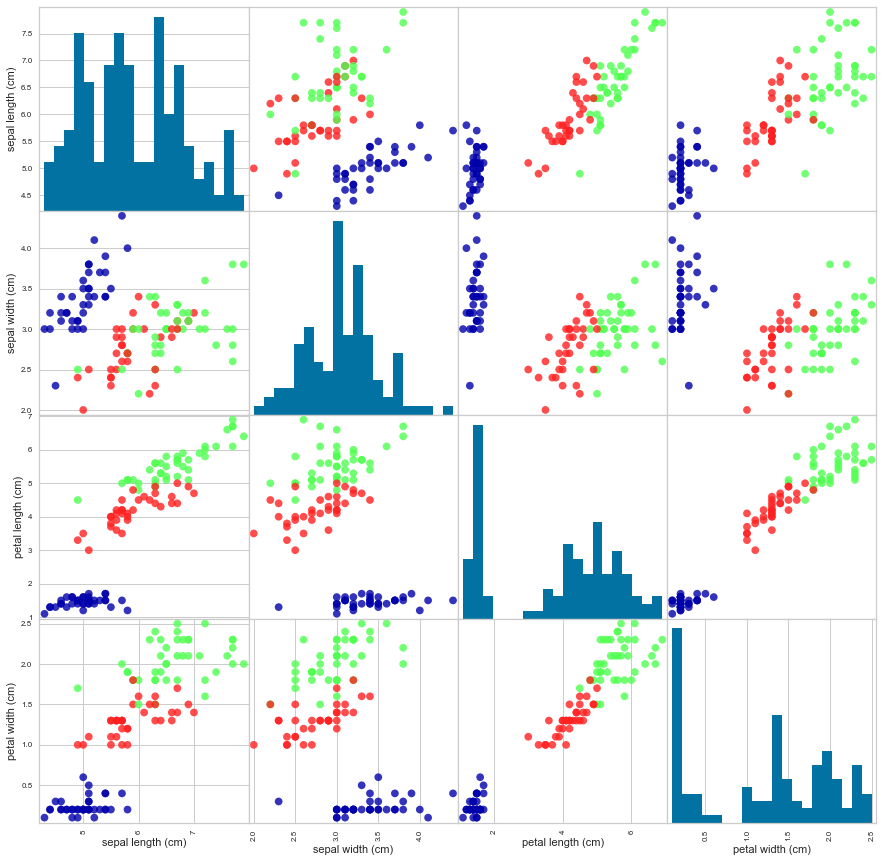

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0)
from pandas.plotting import scatter_matrix
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)


In [6]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [45]:
train_subset = train[['age','balance','day','campaign','previous']]

In [19]:
train_features = train.columns


features = train_subset.columns
print(features)
train_subset.head()

Index(['age', 'balance', 'day', 'campaign', 'previous'], dtype='object')


,age,balance,day,campaign,previous
0,30,1787,19,1,0
1,33,4789,11,1,4
2,35,1350,16,1,1
3,30,1476,3,4,0
4,59,0,5,1,0


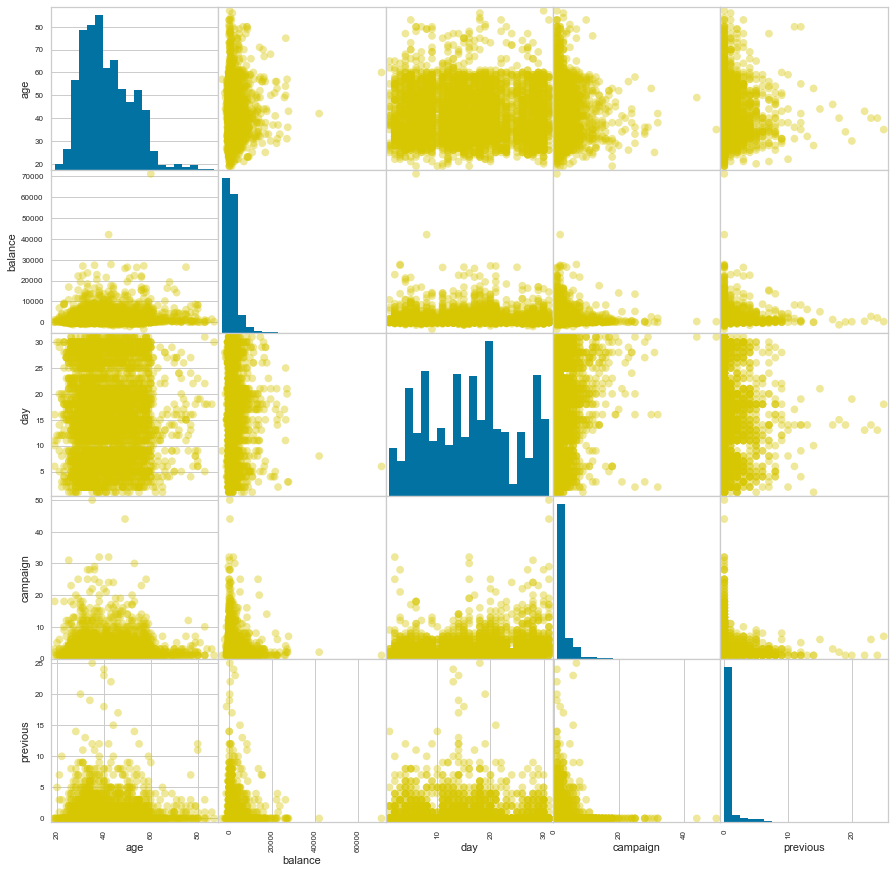

In [104]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_subset, train[['y']], random_state=42)
from pandas.plotting import scatter_matrix

train_subset_dataframe = pd.DataFrame(train_subset, columns=features)
#create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(train_subset_dataframe, c=train[['y']], figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.4, cmap=mglearn.cm3)


#try:
#    train_subset_dataframe = pd.DataFrame(X_train, columns=train_features)
# create a scatter matrix from the dataframe, color by y_train
#    grr = scatter_matrix(train_subset_dataframe , c=y_train, figsize=(15, 15), marker='o',
#    hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
#except ValueError:  #raised if `y` is empty.
#    pass


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_subset)
X_scaled = scaler.transform(train_subset)

In [ ]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)